# 4pwUadR4W2

In [ ]:
import os, sys
import pandas as pd
import numpy as np

# set a seed to ensure reproducibility
seed = 42
rnd  = np.random.RandomState(seed)

# Matplotlib plotting settings
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib version: {}'.format(mp.__version__))

FONTSIZE = 16
params = {
         'axes.labelsize': FONTSIZE,
         'axes.titlesize': FONTSIZE,
         'xtick.labelsize':FONTSIZE,
         'ytick.labelsize':FONTSIZE}
plt.rcParams.update(params)

matplotlib version: 3.3.4


## 1.1 Load the dataset

In [ ]:
train = pd.read_csv ("ATLAS_higgs_train.csv")
train.head()

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,68.515258,57.174385,4.283580,556.406882,-11,0.490221,-2.302279,68.776711,-11,0.910430,...,50.775758,11,-0.495413,-1.409834,28.700672,11,0.542029,-0.328558,17.054512,1
1,84.330551,25.551337,1.101106,266.768190,-11,1.291437,1.917571,77.658719,11,0.142028,...,61.922754,-13,0.208367,1.411837,30.645279,13,1.380638,0.300915,8.034711,-1
2,90.902327,30.404745,2.394863,211.879331,-13,0.702544,-0.946013,91.046750,13,0.958006,...,32.417166,11,0.385190,0.934649,17.942230,-11,0.672241,-1.410558,14.799019,-1
3,91.129112,26.609989,1.040268,56.235126,-11,-2.450392,3.123466,58.988305,11,-1.276226,...,30.001736,-13,-1.275654,0.280533,12.816265,13,-2.283192,-2.326921,11.448904,1
4,87.525977,32.304742,3.674720,351.241850,11,-1.303559,0.963711,66.502133,-11,-0.254885,...,26.519908,-13,-1.052104,0.041387,22.981393,13,0.099710,1.758643,12.038583,1


In [ ]:
#View all the columns
train.columns

Index(['Z1mass', 'Z2mass', 'detajj', 'massjj', 'l1pdgid', 'l1eta', 'l1phi',
       'l1pt', 'l2pdgid', 'l2eta', 'l2phi', 'l2pt', 'l3pdgid', 'l3eta',
       'l3phi', 'l3pt', 'l4pdgid', 'l4eta', 'l4phi', 'l4pt', 'sample'],
      dtype='object')

In [ ]:
# List of columns to keep
columns_to_keep = ['detajj', 'massjj', 'sample']
# Drop columns not in columns_to_keep
train_df = train[columns_to_keep]
train_df.head()

,detajj,massjj,sample
0,4.283580,556.406882,1
1,1.101106,266.768190,-1
2,2.394863,211.879331,-1
3,1.040268,56.235126,1
4,3.674720,351.241850,1


## 1.2 Compute the Gini index

$$
G_i = 1 - \sum_{k=1}^{N_{\text{classes}}} \left(\frac{N_{k,i}}{N_i}\right)^2
$$
Where:

- $ G_i$ is the Gini index for the \( i \)th node or group.
- $ N_{\text{classes}}$ is the number of classes or categories.
- $ N_{k,i}$ is the number of instances in the \( i \)th node or group that belong to class \( k \).
- $ N_i $ is the total number of instances in the \( i \)th node or group.


In [ ]:
def gini_index(y):

    total_samples = len(y)  #the total number of samples

    if total_samples == 0:   #return zero if there are no samples as the impurity is zero.
        return 0.0

    # Count the occurrences of each class
    class_counts = {}
    for label in y:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    # Calculate Gini impurity
    impurity = 1.0
    for count in class_counts.values():
        probability = count / total_samples
        impurity -= probability ** 2

    return impurity

In [ ]:
gini_index(train_df['sample'])

0.5

The new dataset has two inputs and one output in stored in the column sample. The gini index of 0.5 makes sense as the ouput is split between the two variables.

An example

In [ ]:
class_labels = [1, 1, 0, 1, 0, 0, 1]
output = gini_index(class_labels)
print(output)


0.48979591836734704


## 1.3 Calculate the cost
Write a function computing the cost function in the CART algorithm.

\begin{equation*}
J(j, t_j) = \frac{N_\text{left}}{N_\text{node}} G_\text{left} + \frac{N_\text{right}}{N_\text{node}} G_\text{right} \;,
\end{equation*}

In [ ]:
def calculate_cost(data, labels, feature_values, threshold):

    # Determine which samples go to the left and the right based on the threshold
    left_indices = np.where(feature_values <= threshold)[0]
    right_indices = np.where(feature_values > threshold)[0]

    # Count the number of samples in the left and right nodes
    N_left = len(left_indices)
    N_right = len(right_indices)

    # Extract the labels of samples in the left and right child nodes
    labels_left = [labels[i] for i in left_indices]
    labels_right = [labels[i] for i in right_indices]

    # Calculate Gini index for left and right child nodes using the provided gini_index function
    g_left = gini_index(labels_left)
    g_right = gini_index(labels_right)

    N_node = len(labels)

    cost = (N_left / N_node) * g_left + (N_right / N_node) * g_right
    return cost


In [ ]:
threshold = train_df['detajj'].median()
cost = calculate_cost(train_df, train_df['sample'], train_df['detajj'], threshold)

# Print the computed cost
print("Cost:", cost)


Cost: 0.4823065077551021


In [ ]:
threshold = train_df['massjj'].median()
cost = calculate_cost(train_df, train_df['sample'], train_df['massjj'], threshold)

# Print the computed cost
print("Cost:", cost)


Cost: 0.4696716734693879


## 1.4 Main function: code a Decision Stump

In [ ]:
def decision_stumper(data, labels, features):

    # Initialize variables to store the best feature, threshold, and cost
    best_feature = None
    best_threshold = None
    min_cost = float('inf')  # Initialize the minimum cost to positive infinity

    # Iterate over each feature column in the dataset
    for feature in features:
        feature_values = data[feature]

        # Iterate over unique values of the feature to use as potential thresholds
        for threshold in np.linspace(1, 1000, 200):
            # Calculate the cost for the current feature-threshold pair
            cost = calculate_cost(data, labels, feature_values, threshold)

            # Update the best feature, threshold, and cost if the current cost is lower
            if cost < min_cost:
                min_cost = cost
                best_feature = feature
                best_threshold = threshold

    # Return the best feature and threshold for the decision stump
    return best_feature, best_threshold,min_cost


In [ ]:
best_feature, best_threshold, min_cost = decision_stumper(train_df, train_df['sample'], ['detajj', 'massjj'])

# Print the result
print("Best feature:", best_feature)
print("Best threshold:", best_threshold)
print("Min cost", min_cost)

Best feature: massjj
Best threshold: 216.8643216080402
Min cost 0.45643979414619246


## 1.5 Plot the cut

In [ ]:
# GLOBAL VARIABLES
XNAME = 'detajj'; XLABEL = r'$|\Delta\eta_{jj}|$'
YNAME = 'massjj'; YLABEL = r'$m_{jj}$ (GeV)'

inputs= [XNAME, YNAME] ;

XBINS = 5 ; XMIN = 0 ; XMAX = 5    ; XSTEP = 1
YBINS = 5 ; YMIN = 0 ; YMAX = 1000 ; YSTEP = 200

# Creating reduced datasets with detajj & massjj only
X_train = train_df[inputs] ; y_train = train_df['sample']



In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(sig, bkg, threshold=None, ds=None,
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=12, alpha=0.3, title="Scatter plot"):

    fig, ax = plt.subplots(figsize=fgsize)

    # Annotate x-axis
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(xlabel)
    ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

    # Annotate y-axis
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(ylabel)
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

    # Scatter signal and background:
    ax.scatter(sig[xname], sig[yname], marker='o', s=15, c='b', alpha=alpha, label='VBF')
    ax.scatter(bkg[xname], bkg[yname], marker='*', s= 5, c='r', alpha=alpha, label='ggf')

    # Decision surface
    if ds:
        (xx, yy, Z) = ds
        cs = plt.contourf(xx, yy, Z, colors=['red','blue'], alpha=0.3)

    # Draw the threshold line
    if threshold is not None:
        ax.axhline(y=threshold, color='black', linestyle='-', label=f'Threshold: {threshold}')

    # Legend and plot:
    ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
    ax.set_title(title, pad=20)
    plt.show()

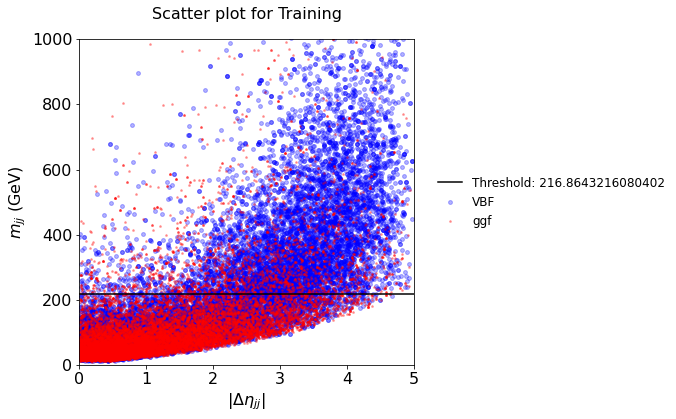

In [ ]:
train_vbf = X_train[y_train== 1]
train_ggf = X_train[y_train== -1]


plot_scatter(train_vbf,train_ggf,best_threshold,title="Scatter plot for Training")



## 2. Plotting mission: the overtraining check

An overtraining check plot is a graphical representation used to assess whether a machine learning model is overtraining, meaning it's being trained too much or under too harsh conditions, leading to overfitting. The plot allows the visualization of the model's training dynamics, particularly the divergence between training and validation performance, to identify signs of overtraining and adjust their training strategies accordingly.

X-axis: Represents the output scores or predictions made support vector machine..

Y-axis: Represents a measure of model performance, often the classification accuracy, precision, recall, or F1-score, computed on a separate validation dataset.

The term "overtraining" refers to a situation where a model performs exceptionally well on the training data but fails to generalize to unseen data. This phenomenon occurs when the model learns to memorize the training examples rather than capturing the underlying patterns that are essential for making accurate predictions on new data.

The purpose of an overtraining check plot is to visualize the distribution of model predictions on both the training and validation datasets. By comparing these distributions, one can identify signs of overtraining. Specifically, if the model is overfitting, it may exhibit excessively high predictions or extreme scores on the training data, leading to a noticeable divergence between the training and validation distributions.



## 2.2 Reproducing the plot

In [ ]:
test = pd.read_csv("ATLAS_higgs_test.csv")
test.head()

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,90.711948,25.922728,2.431133,173.757144,11,-0.849901,-2.728213,72.788969,-11,-0.750625,...,60.229039,-11,-0.545617,-2.015145,13.206232,11,-2.340391,-1.073797,10.162846,-1
1,58.631564,46.235702,2.620412,401.772362,-13,-2.309254,0.167833,57.749133,13,-1.107437,...,33.654371,13,-1.233964,0.641004,32.901371,-13,-0.792200,-1.808691,17.379645,-1
2,91.100929,28.130267,2.075246,225.324866,-11,-0.286215,-1.731155,122.398156,-11,-0.493687,...,24.173152,11,-1.921155,-0.438101,14.198083,11,-0.126846,-0.055109,12.707688,1
3,90.172605,22.277340,0.294412,60.658573,13,-0.388597,-1.856986,42.232105,-13,-2.003138,...,35.935008,13,0.237777,-2.934559,10.798683,-13,-1.028520,1.051412,8.909199,1
4,74.644403,16.199442,2.717867,147.172027,-11,1.361699,2.887043,51.820305,11,1.901612,...,40.411945,13,1.455313,-1.815577,21.598410,-13,0.429353,-1.864512,10.556684,-1


In [ ]:
X_train = train[inputs] ; y_train = train['sample']

X_test  =  test[inputs] ; y_test  =  test['sample']

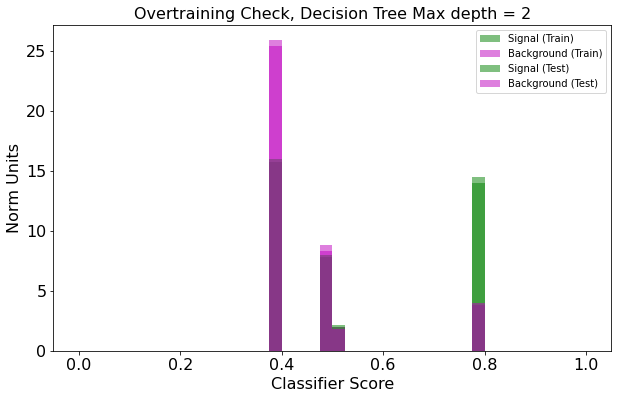

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def plot_overtraining_check(classifier, features_train, labels_train, features_test, labels_test,
                            positive_label, plot_title=None, x_axis_label='Classifier Score'):
    # Split the datasets into positive and negative classes
    features_train_positive = features_train[labels_train == positive_label]
    features_train_negative = features_train[labels_train != positive_label]

    features_test_positive = features_test[labels_test == positive_label]
    features_test_negative = features_test[labels_test != positive_label]

    # Train the classifier
    classifier.fit(features_train, labels_train)

    # Obtain decision values for both training and testing sets
    decision_values_train = classifier.predict_proba(features_train)[:, 1]
    decision_values_test = classifier.predict_proba(features_test)[:, 1]

    # Calculate normalization factors
    norm_factor_train = len(features_train) / (len(features_train) + len(features_test))
    norm_factor_test = len(features_test) / (len(features_train) + len(features_test))

    # Plotting histograms for the decision values
    plt.figure(figsize=(10, 6))

    plt.hist(decision_values_train[labels_train == positive_label], bins=40, range=(0, 1), alpha=0.5, color='g',
             label='Signal (Train)', density=norm_factor_train, histtype='barstacked')
    plt.hist(decision_values_train[labels_train != positive_label], bins=40, range=(0, 1), alpha=0.5, color='m',
             label='Background (Train)', density=norm_factor_train, histtype='barstacked')

    plt.hist(decision_values_test[labels_test == positive_label], bins=40, range=(0, 1), alpha=0.5, color='g',
             label='Signal (Test)', density=norm_factor_test, histtype='bar', linestyle='dashed')
    plt.hist(decision_values_test[labels_test != positive_label], bins=40, range=(0, 1), alpha=0.5, color='m',
             label='Background (Test)', density=norm_factor_test, histtype='bar', linestyle='dashed')

    plt.title(plot_title)
    plt.xlabel(x_axis_label)
    plt.ylabel('Norm Units')
    plt.legend()
    plt.show()

# Decision Tree classifier with maximum depth of 2
tree_clf = DecisionTreeClassifier(max_depth=2)

# Plot overtraining check
plot_overtraining_check(tree_clf, X_train, y_train, X_test, y_test,
                          plot_title='Overtraining Check, Decision Tree Max depth = 2', positive_label=1)


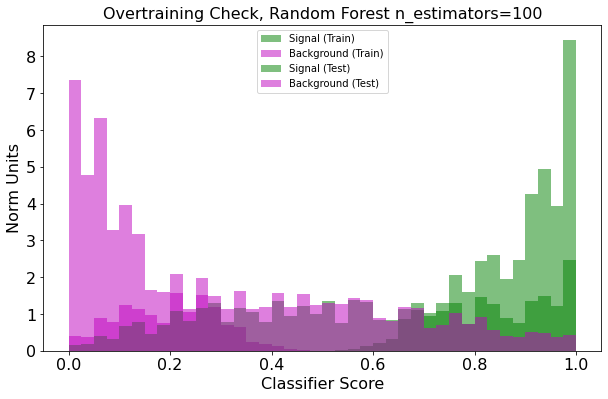

In [ ]:
# Random Forest classifier with 100 estimators
random_clf = RandomForestClassifier(n_estimators=100, random_state=4)

# Plot overtraining check
plot_overtraining_check(random_clf, X_train, y_train, X_test, y_test,
                        plot_title='Overtraining Check, Random Forest n_estimators=100', positive_label=1)


This model is overfitting as the gap between the testing and training data is huge.
This maybe due to the default setting of the classifier's hypeparameters. It is not training well on new unseen data.

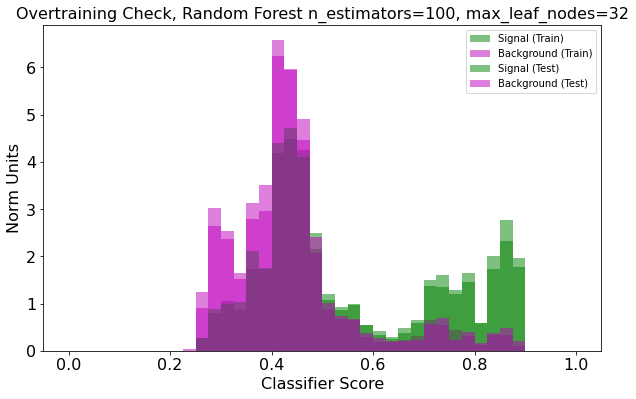

In [ ]:
# Random Forest classifier with 100 estimators and max leaf nodes set to 32
random_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, random_state=4)

# Plot overtraining check
plot_overtraining_check(random_clf, X_train, y_train, X_test, y_test,
                        plot_title='Overtraining Check, Random Forest n_estimators=100, max_leaf_nodes=32', positive_label=1)


The model is not as overfitting as the first one as the gap between the two data sets has become smaller.

The difference in hyperparameters affects how the Random Forest model learns from the data and subsequently how it makes predictions. Therefore, the decision boundaries and prediction behavior of the two models is differ, leading to different overtraining check plots.
The number of leaves also influences model complexity, overfitting, interpretability, computational efficiency, and generalization performance. It should be carefully tuned based on the specific dataset and modeling goals to achieve the best results.
